# Homework 5 - Optimization

***
**Name**: Payoj Jain
***

## Goal

The goal of this assignment is to use gradient based optimization algorithms to find the minum for the Rosenbrock function and to optmizie the 1 layer MLP network you built in **Assignment 4**.

## 1. Optimizing the Rosenbrock function

More information can be found here https://en.wikipedia.org/wiki/Rosenbrock_function
    
**Note: For this assignment, we will choose a = 1 and b = 100**

In [1]:
# Set random seed 
import random
import unittest

random.seed(0)

In [2]:
def rosenbrock(a, b, x, y):
    """
    Inputs:
    a,b : parameters 
    x, y: inputs
    
    Outputs:
    out: Rosenbrock function evaluated at x and y
    """
    return (a-x)**2 + b*(y-x**2)**2

In [3]:
def rosenbrock_grad(a, b, x, y):
    """
    Calculate gradient of the rosenbrock function wrt x and y
    
    Inputs:
    a, b: parameters
    x, y: inputs
    
    Outputs:
    grad_x, grad_y: Gradients wrt x and y
    """
    grad_x = 2*(x - a) - 4*b*x*(y-x**2)
    grad_y = 2*b*(y-x**2)
    return grad_x, grad_y 

Below, you are given skeleton code for optimizing the rosenbrock function using various update rules. Following each function, there are a few function calls with specific hyperparameter choices. The outputs for these will be used to grade your work.

Termination condition: 

1. Reached the n_epochs limit 

2. The change in value of the function at $x_t,y_t$ and $x_{t+1},y_{t+1}$ is <= tolerance 

All these functions share the same structure i.e apart from the update rule (and keeping track of past variables) very little changes across these functions.

Note: since there is no randomness involved, we expect the outputs to closely match those of our implementations.

In [4]:
def rosenbrock_sgd(initial_x, initial_y, a, b, n_epochs, lr, tolerance):
    """
    Use Vanilla SGD to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    tolerance: Tolerance for the error. Terminate if the function value does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    
    final_x = initial_x
    final_y = initial_y
    change = function_value = rosenbrock(a,b,initial_x,initial_y)
    stop_epoch = 0
    
    for epoch in range(n_epochs):
        if(change < tolerance):
            print('SGD',final_x, final_y, stop_epoch)
            return final_x,final_y,stop_epoch
        
        grad_x, grad_y = rosenbrock_grad(a,b,final_x,final_y)

        final_x = final_x - lr*grad_x
        final_y = final_y - lr*grad_y
        
        new_function_value = rosenbrock(a,b,final_x,final_y)
        change = abs(new_function_value - function_value)
        function_value = new_function_value
        stop_epoch = epoch
    return final_x,final_y,n_epochs

In [5]:
def rosenbrock_momentum(initial_x, initial_y, a, b, n_epochs, lr, mntm, nesterov, tolerance):
    """
    Use momentum to optimize the Rosenbrock function
    
    Tip: While implementing nesterov update, you will need the gradient at the next step as well. 
        Instead, to simplify your implementation, you can use an alternative form of the nesterov 
        update which only uses the gradient at the current step.
        Without nesterov, your update will be -> learning_rate*(gradient + momentum*grad_history)
        With nesterov, you update will be -> lr*((1+mntm)*gradient + (mntm)^2 * grad_history)
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    mntm: momentum factor
    nesterov: True if nesterov update is to be used
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    
    final_x = initial_x
    final_y = initial_y
    change = function_value = rosenbrock(a,b,initial_x,initial_y)
    stop_epoch = 0
    update_x, update_y = 0, 0

    if nesterov:
        gamma1 = 1 + mntm
        gamma2 = mntm**2
    else:
        gamma1 = 1
        gamma2 = mntm
            
    for epoch in range(n_epochs):
        if(change < tolerance):
            print('momentum','nesterov : ',nesterov,final_x, final_y, stop_epoch)
            return final_x,final_y,stop_epoch
        
            
        grad_x, grad_y = rosenbrock_grad(a,b,final_x,final_y)
        
        update_x = lr*(gamma1*grad_x + gamma2*update_x)
        update_y = lr*(gamma1*grad_y + gamma2*update_y)
                
        final_x = final_x - update_x
        final_y = final_y - update_y
        
        new_function_value = rosenbrock(a,b,final_x,final_y)
        change = abs(new_function_value - function_value)
        function_value = new_function_value
        stop_epoch = epoch
        
    return final_x,final_y,n_epochs
        

In [6]:
def rosenbrock_adagrad(initial_x, initial_y, a, b, n_epochs, lr, eps, tolerance):
    """
    Use Adagrad to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: Learning rate
    eps: The fudge factor (used in the denominator of the update to reduce numerical instability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    final_x = initial_x
    final_y = initial_y
    change = function_value = rosenbrock(a,b,initial_x,initial_y)
    stop_epoch = 0
    r_x, r_y = 0,0
    
    for epoch in range(n_epochs):
        if(change < tolerance):
            print('adagrad',final_x, final_y, stop_epoch)
            return final_x,final_y,stop_epoch
        
        grad_x, grad_y = rosenbrock_grad(a,b,final_x,final_y)
        
        r_x = r_x + grad_x*grad_x
        r_y = r_y + grad_y*grad_y
        
        update_x = lr/((eps+r_x)**0.5)*grad_x
        update_y = lr/((eps+r_y)**0.5)*grad_y
        
        final_x = final_x - update_x
        final_y = final_y - update_y
        
        new_function_value = rosenbrock(a,b,final_x,final_y)
        change = abs(new_function_value - function_value)
        function_value = new_function_value
        stop_epoch = epoch
        
    return final_x,final_y,n_epochs
    

In [7]:
def rosenbrock_adadelta(initial_x, initial_y, a, b, n_epochs, rho, eps, tolerance):
    """
    Use Adadelta to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    rho: Averaging factor
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    exponential_decay_update_x_avg = 0
    exponential_decay_update_y_avg = 0
    
    exponential_decay_grad_x_avg = 0
    exponential_decay_grad_y_avg = 0
    
    final_x = initial_x
    final_y = initial_y
    change = function_value = rosenbrock(a,b,initial_x,initial_y)
    stop_epoch = 0
    
    for epoch in range(n_epochs):
        if(change < tolerance):
            print('adadelta',final_x, final_y, stop_epoch)
            return final_x,final_y,stop_epoch
        
        grad_x, grad_y = rosenbrock_grad(a,b,final_x,final_y)
        
        exponential_decay_grad_x_avg = rho*exponential_decay_grad_x_avg + (1-rho)*grad_x**2
        exponential_decay_grad_y_avg = rho*exponential_decay_grad_y_avg + (1-rho)*grad_y**2
        
        rms_grad_x  = (exponential_decay_grad_x_avg + eps)**0.5
        rms_grad_y  = (exponential_decay_grad_y_avg + eps)**0.5
        
        rms_update_x = (exponential_decay_update_x_avg + eps)**0.5
        rms_update_y = (exponential_decay_update_y_avg + eps)**0.5
        
        update_x = (rms_update_x/rms_grad_x)*grad_x
        update_y = (rms_update_y/rms_grad_y)*grad_y
        
        final_x = final_x - update_x
        final_y = final_y - update_y
        
        exponential_decay_update_x_avg = rho*exponential_decay_update_x_avg + (1-rho)*update_x**2
        exponential_decay_update_y_avg = rho*exponential_decay_update_y_avg + (1-rho)*update_y**2
        
        new_function_value = rosenbrock(a,b,final_x,final_y)
        change = abs(new_function_value - function_value)
        function_value = new_function_value
        stop_epoch = epoch

    return final_x,final_y,n_epochs

In [8]:
def rosenbrock_rmsprop(initial_x, initial_y, a, b, n_epochs, lr, rho, eps, tolerance):
    """
    Use RMSprop to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr:learning rate
    rho: Averaging factor
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    exponential_decay_grad_x_avg = 0
    exponential_decay_grad_y_avg = 0
    
    final_x = initial_x
    final_y = initial_y
    change = function_value = rosenbrock(a,b,initial_x,initial_y)
    stop_epoch = 0
    
    for epoch in range(n_epochs):
        if(change <= tolerance):
            print('rmsprop',final_x, final_y, stop_epoch)
            return final_x,final_y,stop_epoch
        
        grad_x, grad_y = rosenbrock_grad(a,b,final_x,final_y)
        
        exponential_decay_grad_x_avg = rho*exponential_decay_grad_x_avg + (1-rho)*grad_x**2
        exponential_decay_grad_y_avg = rho*exponential_decay_grad_y_avg + (1-rho)*grad_y**2
        
        
        update_x = (lr*grad_x/(eps + exponential_decay_grad_x_avg**0.5))
        update_y = (lr*grad_y/(eps + exponential_decay_grad_y_avg**0.5))
        
        final_x = final_x - update_x
        final_y = final_y - update_y
        
        new_function_value = rosenbrock(a,b,final_x,final_y)
        change = abs(new_function_value - function_value)
        function_value = new_function_value
        stop_epoch = epoch

    return final_x,final_y,n_epochs

In [9]:
def rosenbrock_adam(initial_x, initial_y, a, b, n_epochs, lr, beta1, beta2, eps, tolerance):
    """
    Use Adam to optimize the Rosenbrock function
    
    Inputs:
    initial_x, initial_y : Starting values
    a, b : parameters
    n_epochs : Maximum no of epochs 
    lr: learning rate
    beta1, beta2: Averaging factors
    eps: fudging factor (for numerical stability)
    tolerance: Tolerance for the error. Terminate if the error does not change by atleast this much.
    
    Outputs:
    final_x, final_y : Converged point after termination
    stop_epoch: Epoch no at which we stop
    """
    m_x, m_y = 0, 0
    
    v_x, v_y = 0, 0
    
    final_x = initial_x
    final_y = initial_y
    change = function_value = rosenbrock(a,b,initial_x,initial_y)
    stop_epoch = 0
    
    for epoch in range(n_epochs):
        if(change < tolerance):
            print('adam',final_x, final_y, stop_epoch)
            return final_x,final_y,stop_epoch
        
        grad_x, grad_y = rosenbrock_grad(a,b,final_x,final_y)
        
        m_x = beta1*m_x + (1 - beta1)*grad_x
        m_y = beta1*m_y + (1 - beta1)*grad_y
        
        v_x = beta2*v_x + (1 - beta2)*grad_x**2
        v_y = beta2*v_y + (1 - beta2)*grad_y**2
        
        m_x_avg = m_x /(1 - beta1**(epoch+1))
        m_y_avg = m_y /(1 - beta1**(epoch+1))
        
        v_x_avg = v_x /(1 - beta2**(epoch+1))
        v_y_avg = v_y /(1 - beta2**(epoch+1))
        
        update_x = (lr/(v_x_avg**0.5+eps))*m_x_avg
        update_y = (lr/(v_y_avg**0.5+eps))*m_y_avg
        
        final_x = final_x - update_x
        final_y = final_y - update_y
        
        new_function_value = rosenbrock(a,b,final_x,final_y)
        change = abs(new_function_value - function_value)
        function_value = new_function_value
        stop_epoch = epoch
        
    return final_x,final_y,n_epochs

## Unit Tests

In [10]:
class TestRosenBrock(unittest.TestCase):
    def test_sgd(self):
        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 1, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.002, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)

        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 5, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.009959805751775453, places = 4)
        self.assertAlmostEqual(final_y, 2.091e-05, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_sgd(0, 0, 1, 100, 100000, 0.001, 1e-06)
        self.assertAlmostEqual(final_x, 0.965628504058544, places = 4)
        self.assertAlmostEqual(final_y, 0.932297997695398, places = 4)
        self.assertAlmostEqual(stop_epoch,  5570, places = 4)
    
    def test_momentum(self):
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 1, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.0039, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 5, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.019358983472059735, places = 4)
        self.assertAlmostEqual(final_y, 0.00013646707993741637, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 100000, 0.001, 0.95, True, 1e-06)
        self.assertAlmostEqual(final_x, 0.975228639507472, places = 4)
        self.assertAlmostEqual(final_y, 0.9509702874332484, places = 4)
        self.assertAlmostEqual(stop_epoch, 3253, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 1, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.002, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 5, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.00996736498329375, places = 4)
        self.assertAlmostEqual(final_y, 2.0949769804179422e-05, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_momentum(0, 0, 1, 100, 100000, 0.001, 0.95, False, 1e-06)
        self.assertAlmostEqual(final_x, 0.9656473450926458, places = 4)
        self.assertAlmostEqual(final_y, 0.9323344634810155, places = 4)
        self.assertAlmostEqual(stop_epoch, 5566, places = 4)

    def test_adagrad(self):
        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 1, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.009999875002343702, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)

        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 5, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0321538388386626, places = 4)
        self.assertAlmostEqual(final_y, 0.0007748244054554124, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adagrad(0, 0, 1, 100, 100000, lr = 0.01, eps = 1e-04, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9601029668996042, places = 4)
        self.assertAlmostEqual(final_y, 0.9217502990713288, places = 4)
        self.assertAlmostEqual(stop_epoch, 8105, places = 4)
        

    def test_adadelta(self):
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 1, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0004472135843196183, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 5, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.0022774214255509655, places = 4)
        self.assertAlmostEqual(final_y, -0.00020407559768761523, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adadelta(0, 0, 1, 100, 10000, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9320850940444182, places = 4)
        self.assertAlmostEqual(final_y, 0.8726938644568353, places = 4)
        self.assertAlmostEqual(stop_epoch, 2341, places = 4)
        
    def test_rmsprop(self):
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 1, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.004472135843196183, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 5, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.01471318674752176, places = 4)
        self.assertAlmostEqual(final_y, 0.00016279213371358814, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_rmsprop(0, 0, 1, 100, 100000, lr = 0.001, rho = 0.95, eps = 1e-08, tolerance = 1e-08)
        self.assertAlmostEqual(final_x, 0.9876128078500009, places = 4)
        self.assertAlmostEqual(final_y,  0.9768279433532969, places = 4)
        self.assertAlmostEqual(stop_epoch, 3172, places = 4)

    def test_adam(self):
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 1, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.000999999995, places = 4)
        self.assertAlmostEqual(final_y, 0, places = 4)
        self.assertAlmostEqual(stop_epoch, 1, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 5, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.004999562994105255, places = 4)
        self.assertAlmostEqual(final_y, -0.0005982751561081573, places = 4)
        self.assertAlmostEqual(stop_epoch, 5, places = 4)
        
        final_x, final_y, stop_epoch = rosenbrock_adam(0, 0, 1, 100, 10000, lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-08, tolerance = 1e-06)
        self.assertAlmostEqual(final_x, 0.9882985356765371, places = 4)
        self.assertAlmostEqual(final_y, 0.9767314100355338, places = 4)
        self.assertAlmostEqual(stop_epoch, 2191, places = 4)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

......

adadelta 0.9320850940444184 0.8726938644568357 2341
adagrad 0.9601029668996042 0.9217502990713288 8105
adam 0.9882985356765367 0.9767314100355323 2191
momentum nesterov :  True 0.975228639507472 0.9509702874332484 3253
momentum nesterov :  False 0.9656473450926458 0.9323344634810155 5566
rmsprop 0.9876101743117767 0.9768227299685097 3172
SGD 0.965628504058544 0.932297997695398 5570



----------------------------------------------------------------------
Ran 6 tests in 0.070s

OK


## Optimizing Neural Networks

In [11]:
from tensor import Tensor
import numpy as np
from sklearn.datasets import make_classification

### 1. Implementing the model

In [12]:
from collections import defaultdict

class MLP(object):
    def __init__(self, n_in, n_hid, n_out):

        self.l1 = Tensor(np.random.randn(n_in, n_hid))
        self.l2 = Tensor(np.random.randn(n_hid, n_out))
        
        self.state = defaultdict(dict)
        
        # Initialize an empty dictionary (per pair of weights and biases) for future use
        # This dictionary will store various histories needed int he algorithms to be implemented
        for i in [1, 2]:
            self.state[str(i)] = {}

    def forward(self, X):
        """
            Implement the forward pass.

            params:
            X (NxM Tensor):
                M dimensional input to be feed forward to the network.

            returns:

            y_hat (1xN Tensor): activations of the output layer.
        """

        self.act_l1 = X.dot(self.l1).relu()
        self.act_l2 = self.act_l1.dot(self.l2)

        return self.act_l2

    def update(self, opt):
        """
            Implement the update rule for network weights and biases.

            return:

            none.
        """
        
        grad_1, grad_2 = opt.update_grad(self)
        
        self.l1.value += grad_1.value
        self.l2.value += grad_2.value
        
    def get_state_accum(self, param, state_dict, name):
        """
        Return a particular variable associated with a layer. If it has not been initialized 
        (i.e. on the first iteration), then create that variable with the same dimention as param

        Example usage: get_state_accum(W, nn.state[str(layer)], 'W_grad_history') would return the 
                       gradient in the past iteration (assuming you update W_grad_history in the dictionary every
                       epoch)

        Inputs:
        state_dict: dictionary to be queried 
        name: property of interest
        param: If state_dict[name] is being accessed the first time, we initialize it to be a 
               vector with the same dimesions as param
        """
        if name not in state_dict:
            state_dict[name] = np.zeros_like(param)
        return state_dict[name]
    
    def get_layer_params(self, layer):
        """
        Return aparameters of a particular layer
        """
        if layer == 1:
            return self.l1
        else:
            return self.l2
        
    def get_layer_grad(self, layer):
        """ Return gradient of a particular layer """
        if layer == 1:
            return self.l1.grad
        else:
            return self.l2.grad

    def zero_grad(self):
        """
            Resets gradients for each layer defined in
            the constructor.
        """
        self.l1.zero_grad()
        self.l2.zero_grad()

In [13]:
class optimizer():
    def __init__(self, update_rule, **kwargs):
        """
        Set self.update 
        Set parameters from kwargs(variable keyword parameters) according to update type
        """
        self.update = update_rule
        
        if self.update == "sgd":
            self.lr = kwargs['lr']
        elif self.update == "momentum":
            self.lr = kwargs['lr']
            self.mntm = kwargs['mntm']
            self.nesterov = kwargs['nesterov']
        elif self.update == "adagrad":
            self.lr = kwargs['lr']
            self.eps = kwargs['eps']
        elif self.update == "adadelta":
            self.rho = kwargs['rho']
            self.eps = kwargs['eps']
        elif self.update == "rmsprop":
            self.lr = kwargs['lr']
            self.rho = kwargs['rho']
            self.eps = kwargs['eps']
        elif self.update == "adam":
            self.lr = kwargs['lr']
            self.beta1 = kwargs['beta1']
            self.beta2 = kwargs['beta2']
            self.eps = kwargs['eps']
    
    def update_grad(self, model):
        """
        Returns proper update according to the string in self.update
        
        Input:
        model: NN model
        
        Output:
        l1: Update for layer 1
        l2: update for layer 2
        """
        if self.update == 'sgd':
            l1 = self.update_sgd(1, model, self.lr)
            l2 = self.update_sgd(2, model, self.lr)
        elif self.update == 'momentum':
            l1 = self.update_momentum(1, model, self.lr, self.mntm, self.nesterov)
            l2 = self.update_momentum(2, model, self.lr, self.mntm, self.nesterov)
        elif self.update == 'adagrad':
            l1 = self.update_adagrad(1, model, self.lr, self.eps)
            l2 = self.update_adagrad(2, model, self.lr, self.eps)
        elif self.update == 'adadelta':
            l1 = self.update_adadelta(1, model, self.rho, self.eps)
            l2 = self.update_adadelta(2, model, self.rho, self.eps)
        elif self.update == 'rmsprop':
            l1 = self.update_rmsprop(1, model, self.lr, self.rho, self.eps)
            l2 = self.update_rmsprop(2, model, self.lr, self.rho, self.eps)
        elif self.update == 'adam':
            l1 = self.update_adam(1, model, self.lr, self.beta1, self.beta2, self.eps)
            l2 = self.update_adam(2, model, self.lr, self.beta1, self.beta2, self.eps)
            
        return l1, l2
        
    def update_sgd(self, layer, model, lr):
        """
        Update function for sgd.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate

        Outputs:
        update (Tensor)
        """
        name = 'sgd'
        grad = model.get_layer_grad(layer)
        update = -lr*grad
        model.state[str(layer)][name] = update
        return Tensor(update)
    
    def update_momentum(self, layer, model, lr, mntm, nesterov):
        """
        Update function for momentum.
        Make sure you update the past gradients for 'layer' inside this function.

        Tip: While implementing nesterov update, you will need the gradient at the next step as well. 
            Instead, to simplify your implementation, you can use an alternative form of the nesterov 
            update which only uses the gradient at the current step.
            Without nesterov, your update will be -> learning_rate*(gradient + momentum*grad_history)
            With nesterov, you update will be -> lr*((1+mntm)*gradient + (mntm)^2 * grad_history)
            
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        mntm: momentum factor
        nesterov: if True, function returns nesterov accelerated update

        Outputs:
        update (Tensor)
        """
        if nesterov:
            name = 'momentum nesterov'
            gamma1 = 1+mntm
            gamma2 = mntm**2
        else:
            name = 'momentum without nesterov'
            gamma1 = 1
            gamma2 = mntm
            
        grad = model.get_layer_grad(layer)
        
        update_history = model.get_state_accum(grad, model.state[str(layer)], name)
        update = -lr*(gamma1*grad + gamma2*update_history)
        model.state[str(layer)][name] = update
        
        return Tensor(update)
    
    def update_adagrad(self, layer, model, lr, eps):
        """
        Update function for adadelta.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        '''
        r_x = r_x + grad_x*grad_x
        
        update_x = lr/((eps+r_x)**0.5)*grad_x
        
        '''
        name = 'adagrad'
        grad = model.get_layer_grad(layer)
        
        r_history = model.get_state_accum(grad, model.state[str(layer)], name)
        r = r_history + grad**2
        
        model.state[str(layer)][name] = r
        
        update = -lr/((eps+r)**0.5)*grad

        return Tensor(update)
        
    def update_adadelta(self, layer, model, rho, eps):
        """
        Update function for adadelta.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        rho: averaging factor
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        '''
        exponential_decay_grad_x_avg = rho*exponential_decay_grad_x_avg + (1-rho)*grad_x**2
        
        rms_grad_x  = (exponential_decay_grad_x_avg + eps)**0.5

        
        rms_update_x = (exponential_decay_update_x_avg + eps)**0.5
        
        update_x = (rms_update_x/rms_grad_x)*grad_x
        
        exponential_decay_update_x_avg = rho*exponential_decay_update_x_avg + (1-rho)*update_x**2

        
        '''
        update_name = 'adadelta_update'
        grad_name = 'adadelta_grad'
        
        grad = model.get_layer_grad(layer)
        
        update_history = model.get_state_accum(grad, model.state[str(layer)], update_name)
        grad_history = model.get_state_accum(grad,model.state[str(layer)],grad_name)
        
        grad_history = rho*grad_history + (1-rho)*grad**2
        
        rms_grad = (grad_history + eps)**0.5
        rms_update = (update_history + eps)**0.5
        
        update = -(rms_update/rms_grad)*grad
        
        update_history = rho*update_history + (1-rho)*update**2
        
        model.state[str(layer)][update_name] = update_history
        model.state[str(layer)][grad_name] = grad_history
        
        return Tensor(update)
    
    def update_rmsprop(self, layer, model, lr, rho, eps):
        """
        Update function for rmsprop.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        rho : averaging factor
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        '''
        grad_x, grad_y = rosenbrock_grad(a,b,final_x,final_y)
        
        exponential_decay_grad_x_avg = rho*exponential_decay_grad_x_avg + (1-rho)*grad_x**2
        
        update_x = (lr*grad_x/(eps + exponential_decay_grad_x_avg**0.5))

        '''
        
        update_name = 'rmsprop'
        
        grad = model.get_layer_grad(layer)
        
        update_history = model.get_state_accum(grad, model.state[str(layer)], update_name)
        
        update_history = rho*update_history + (1-rho)*grad**2
        
        model.state[str(layer)][update_name] = update_history
        
        update = -(lr*grad)/(eps+update_history**0.5)
        
        return Tensor(update)
    
    def update_adam(self, layer, model, lr, beta1, beta2, eps):
        """
        Update function for adam.
        Make sure you update the moving averages for 'layer' inside this function. 
    
        Inputs:
        layer: layer for which the update has to be returned
        model: NN model to be updated (you need this to access 'state' and update histories)
        lr: learning rate
        beta1, beta2 : averaging factors
        eps : fudge factor (for numerical stability)

        Outputs:
        update (Tensor)
        """
        '''
        grad_x, grad_y = rosenbrock_grad(a,b,final_x,final_y)
        
        m_x = beta1*m_x + (1 - beta1)*grad_x
        
        v_x = beta2*v_x + (1 - beta2)*grad_x**2
        
        m_x_avg = m_x /(1 - beta1**(epoch+1))
        
        v_x_avg = v_x /(1 - beta2**(epoch+1))
        
        update_x = (lr/(v_x_avg**0.5+eps))*m_x_avg
        '''
        
        m_name = 'adam_m'
        v_name = 'adam_v'
        exp_name = 'epoch_num'
        grad = model.get_layer_grad(layer)
        
        m_history = model.get_state_accum(grad, model.state[str(layer)], m_name)
        v_history = model.get_state_accum(grad, model.state[str(layer)], v_name)
        
        m_history = beta1*m_history + (1 - beta1)*grad
        v_history = beta2*v_history + (1 - beta2)*grad**2
        
        exp = model.get_state_accum(1, model.state[str(layer)], exp_name)
        exp += 1
        m_avg = m_history/(1 - beta1**exp)
        v_avg = v_history/(1 - beta2**exp)
        
        model.state[str(layer)][m_name] = m_history
        model.state[str(layer)][v_name] = v_history
        model.state[str(layer)][exp_name] = exp
        
        update = (-lr/(v_avg**0.5 + eps))*m_avg
        
        return Tensor(update)

### 2. Train the model 

In [14]:
def train(model, X, y, epochs, batch_size, opt):
    """
    Implement the train loop.
    
    params:
    model (MLP): 1-hidden-layer MLP model to be trained.
    X (Nx5 ndarray): Training inputs.
    y (Nx1 ndarray): Groundtruth labels.
    epochs (int): number of epochs for training
    batch_size (int)
    opt: optimizer object
    
    returns:
    list of errors (one for each epoch)
    """
    # For each minibatch in each epoch, 
    # 1. do a forward pass on the minibatch
    # 2. Compute Loss on minibatch
    # 3. Do a backward pass to get gradients
    # 4. Update parameters
    # 5. Compute error over epoch
    

    from sklearn.utils import shuffle
    mean_squared_error = []

    for epoch in range(epochs):
        X, y = shuffle(X, y)        
        epoch_error = 0

        for batch in range(0,X.shape[0],batch_size):
            
            X_train = Tensor(X[batch:batch+batch_size])
            y_train = Tensor(y[batch:batch+batch_size])
            
            y_hat = model.forward(X_train)
            
            model.zero_grad()
            
            mse = (y_train - y_hat).pow(2).mean()
            
            mse.backward()
            
            model.update(opt)
            
            epoch_error += mse.value
            
        mean_error = epoch_error/(X.shape[0]/batch_size)
        mean_squared_error.append(mean_error)
    return mean_squared_error
            

### 3. Usage and Tests
***

**Part 3.A**  

Create a model with $I = 5$ inputs, $H = 100$ and $O = 1$ output neuron. Train the model for 100 epochs using the dataset below. Plot the MSE loss for each epoch.

Once you have each optimizer working, which performs best given their initial hyperparameters? Does changing one or more hyperpameters yield better performance for a particular optimizer?

> __ADAGRAD__ seems to perform the best in the given initial hyperparameters. It converges fast and also outputs the minimum loss among other optimisers. 

In [35]:
X, y = np.load("X.npy"), np.load("y.npy")

In [36]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("sgd", lr = 0.001)
mse_sgd = train(model, X, y, 100, 100, opt)
print(mse_sgd[-1])

[ 0.39209503]


In [37]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("momentum", lr = 0.001, mntm = 0.95, nesterov = False)
mse_mntm = train(model, X, y, 100, 100, opt)
print(mse_mntm[-1])

[ 0.33487853]


In [38]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("momentum", lr = 0.001, mntm = 0.95, nesterov = True)
mse_nesterov = train(model, X, y, 100, 100, opt)
print(mse_nesterov[-1])

[ 0.24650738]


In [39]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adagrad", lr = 0.1, eps = 1e-06)
mse_adagrad = train(model, X, y, 100, 100, opt)
print(mse_adagrad[-1])

[ 0.16339876]


In [40]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adadelta", rho = 0.9, eps = 1e-06)
mse_adadelta = train(model, X, y, 100, 100, opt)
print(mse_adadelta[-1])

[ 0.23637568]


In [41]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("rmsprop", lr = 0.001, rho = 0.9, eps = 1e-06)
mse_rmsprop = train(model, X, y, 100, 100, opt)
print(mse_rmsprop[-1])

[ 0.23851036]


In [42]:
model = MLP(X.shape[1], 100, 1)
opt = optimizer("adam", lr = 0.001, beta1 = 0.9, beta2 = 0.999, eps = 1e-04)
mse_adam = train(model, X, y, 100, 100, opt)
print(mse_adam[-1])

[ 0.3322519]


In [43]:
from matplotlib import pyplot as plt

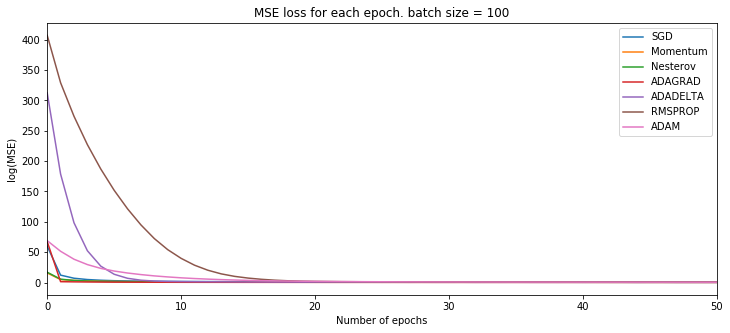

In [44]:
plt.figure(figsize=(12,5))
plt.plot(range(100), mse_sgd, label = 'SGD')
plt.plot(range(100), mse_mntm, label = 'Momentum')
plt.plot(range(100), mse_nesterov, label = 'Nesterov')
plt.plot(range(100), mse_adagrad, label = 'ADAGRAD')
plt.plot(range(100), mse_adadelta, label = 'ADADELTA')
plt.plot(range(100), mse_rmsprop, label = 'RMSPROP')
plt.plot(range(100), mse_adam, label = 'ADAM')
plt.xlim(0,50)
# plt.ylim(0,300)
# plt.yscale('log')
plt.title('MSE loss for each epoch. batch size = 100')
plt.xlabel('Number of epochs')
plt.ylabel('log(MSE)')
plt.legend()

### Hyperparameter tuning

In [49]:
lrs = [0.0001, 0.001, 0.005]
min_sgd_mse = 10
for lr in lrs:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("sgd", lr = lr)
    mse_sgd = train(model, X, y, 100, 100, opt)
    if(mse_sgd[-1] < min_sgd_mse):
        lr_sgd = lr
        min_sgd_mse = mse_sgd[-1]
        sgd_mse = mse_sgd

min_mntm_mse = 10
for lr in lrs:
    mntms = [0.9, 0.95]
    for mntm in mntms:
        model = MLP(X.shape[1], 100, 1)
        opt = optimizer("momentum", lr = lr, mntm = mntm, nesterov = False)
        mse_mntm = train(model, X, y, 100, 100, opt)
        if(mse_mntm[-1] < min_mntm_mse):
            lr_mntm = lr
            mntm_mntm = mntm
            min_mntm_mse = mse_mntm[-1]
            mntm_mse = mse_mntm

min_nesterov_mse = 10
for lr in lrs:
    mntms = [0.9, 0.95]
    for mntm in mntms:
        model = MLP(X.shape[1], 100, 1)
        opt = optimizer("momentum", lr = lr, mntm = mntm, nesterov = True)
        mse_nesterov = train(model, X, y, 100, 100, opt)
        if(mse_nesterov[-1] < min_nesterov_mse):
            lr_nesterov = lr
            nesterov_mntm = mntm
            min_nesterov_mse = mse_nesterov[-1]
            nesterov_mse = mse_nesterov

min_adagrad_mse = 10
for lr in lrs:  
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("adagrad", lr = lr, eps = 1e-06)
    mse_adagrad = train(model, X, y, 100, 100, opt)
    if(mse_adagrad[-1] < min_adagrad_mse):
        lr_adagrad = lr
        min_adagrad_mse = mse_adagrad[-1]
        adagrad_mse = mse_adagrad


min_adadelta_mse = 10
rhos = [0.85, 0.9, 0.95]
for rho in rhos:
    model = MLP(X.shape[1], 100, 1)
    opt = optimizer("adadelta", rho = rho, eps = 1e-06)
    mse_adadelta = train(model, X, y, 100, 100, opt)
    if(mse_adadelta[-1] < min_adadelta_mse):
        rho_adadelta = rho
        min_adadelta_mse = mse_adadelta[-1]
        adadelta_mse = mse_adadelta

min_rmsprop_mse = 10
for lr in lrs:
    rhos = [0.85, 0.9, 0.95]
    for rho in rhos:
        model = MLP(X.shape[1], 100, 1)
        opt = optimizer("rmsprop", lr = lr, rho = rho, eps = 1e-06)
        mse_rmsprop = train(model, X, y, 100, 100, opt)
        if(mse_rmsprop[-1] < min_rmsprop_mse):
            rho_rmsprop = rho
            lr_rmsprop = lr
            min_rmsprop_mse = mse_rmsprop[-1]
            rmsprop_mse = mse_rmsprop

min_adam_mse = 10
for lr in lrs:
    rhos = [0.85, 0.9, 0.95]
    beta1s = [0.85, 0.9, 0.95]
    beta2s = [0.95, 0.98, 0.999]
    for beta1 in beta1s:
        for beta2 in beta2s:
            model = MLP(X.shape[1], 100, 1)
            opt = optimizer("adam", lr = lr, beta1 = beta1, beta2 = beta2, eps = 1e-04)
            mse_adam = train(model, X, y, 100, 100, opt)
            if(mse_adam[-1] < min_adam_mse):
                beta1_adam = beta1
                beta2_adam = beta2
                lr_adam = lr
                min_adam_mse = mse_adam[-1]
                adam_mse = mse_adam

#### Optimal Hyperparameters for each optimiser

In [64]:
print('SGD loss after 100 epochs:     ', min_sgd_mse[0],  'for lr: ', lr_sgd)
print('Momentum loss after 100 epochs:', min_mntm_mse[0], 'for lr: ', lr_mntm, ', mntm: ',mntm_mntm)
print('Nesterov loss after 100 epochs:', min_nesterov_mse[0], 'for lr: ',lr_nesterov, ', mntm: ', nesterov_mntm)
print('ADAGRAD loss after 100 epochs: ', min_adagrad_mse[0], ' for lr: ', lr_adagrad)
print('ADADELTA loss after 100 epochs:', min_adadelta_mse[0], 'for rho: ', rho_adadelta)
print('RMSPROP loss after 100 epochs: ', min_rmsprop_mse[0], 'for lr: ', lr_rmsprop, ', rho: ', rho_rmsprop)
print('ADAM loss after 100 epochs:    ', min_adam_mse[0], 'for lr: ', lr_adam, ', beta1: ', beta1_adam, ', beta2: ', beta2_adam)

SGD loss after 100 epochs:      0.200092062339 for lr:  0.005
Momentum loss after 100 epochs: 0.186055819798 for lr:  0.005 , mntm:  0.95
Nesterov loss after 100 epochs: 0.151616373415 for lr:  0.005 , mntm:  0.95
ADAGRAD loss after 100 epochs:  1.40622455967  for lr:  0.005
ADADELTA loss after 100 epochs: 0.273378865677 for rho:  0.9
RMSPROP loss after 100 epochs:  0.173951423741 for lr:  0.001 , rho:  0.85
ADAM loss after 100 epochs:     0.143814671918 for lr:  0.005 , beta1:  0.9 , beta2:  0.95


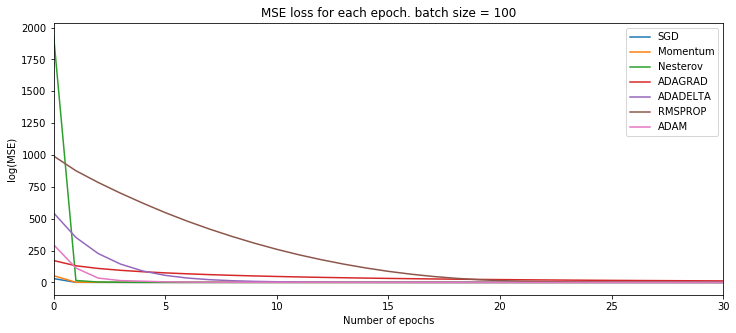

In [56]:
plt.figure(figsize=(12,5))
plt.plot(range(100), sgd_mse, label = 'SGD')
plt.plot(range(100), mntm_mse, label = 'Momentum')
plt.plot(range(100), nesterov_mse, label = 'Nesterov')
plt.plot(range(100), adagrad_mse, label = 'ADAGRAD')
plt.plot(range(100), adadelta_mse, label = 'ADADELTA')
plt.plot(range(100), rmsprop_mse, label = 'RMSPROP')
plt.plot(range(100), adam_mse, label = 'ADAM')
plt.xlim(0,30)
# plt.ylim(0,300)
# plt.yscale('log')
plt.title('MSE loss for each epoch. batch size = 100')
plt.xlabel('Number of epochs')
plt.ylabel('log(MSE)')
plt.legend()

> From the graph we can see that __SGD, Momentum with and without Nestrov__ converge very fast. But looking at the loss __ADAM__ performs better than the others and converges within 10 iterations. 